# Introduction

This project uses k-Nearest Neighbors (kNN) to recommend medicines based on their similarities. The dataset includes medicine details such as name, category, and indication. By applying kNN and encoding categorical variables, we aim to assist healthcare professionals in identifying medicines that share similar characteristics. This approach showcases the practical application of machine learning in personalized medicine recommendations, offering insights into potential alternatives based on medicine properties.

# EDA

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors

In [3]:
#Load and Display the Dataset
df = pd.read_csv('medicine_dataset_yoyo.csv')
df.head()

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,Acetocillin,Antidiabetic,Cream,938 mg,Roche Holding AG,Virus,Over-the-Counter
1,Ibuprocillin,Antiviral,Injection,337 mg,CSL Limited,Infection,Over-the-Counter
2,Dextrophen,Antibiotic,Ointment,333 mg,Johnson & Johnson,Wound,Prescription
3,Clarinazole,Antifungal,Syrup,362 mg,AbbVie Inc.,Pain,Prescription
4,Amoxicillin,Antifungal,Tablet,802 mg,Teva Pharmaceutical Industries Ltd.,Wound,Over-the-Counter


In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            50000 non-null  object
 1   Category        50000 non-null  object
 2   Dosage Form     50000 non-null  object
 3   Strength        50000 non-null  object
 4   Manufacturer    50000 non-null  object
 5   Indication      50000 non-null  object
 6   Classification  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [5]:
# Check the shape of the dataset
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (50000, 7)


In [6]:
# Statistical summary
df.describe()

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
count,50000,50000,50000,50000,50000,50000,50000
unique,64,8,8,999,20,8,2
top,Metostatin,Antidepressant,Inhaler,347 mg,Boehringer Ingelheim GmbH,Infection,Over-the-Counter
freq,860,6354,6364,77,2587,6393,25015


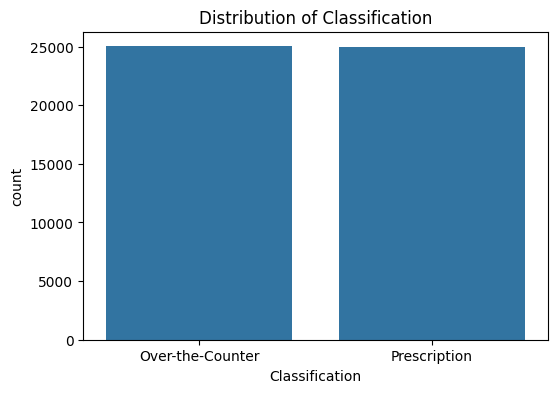

In [7]:
# Distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Classification', data=df)
plt.title('Distribution of Classification')
plt.show()

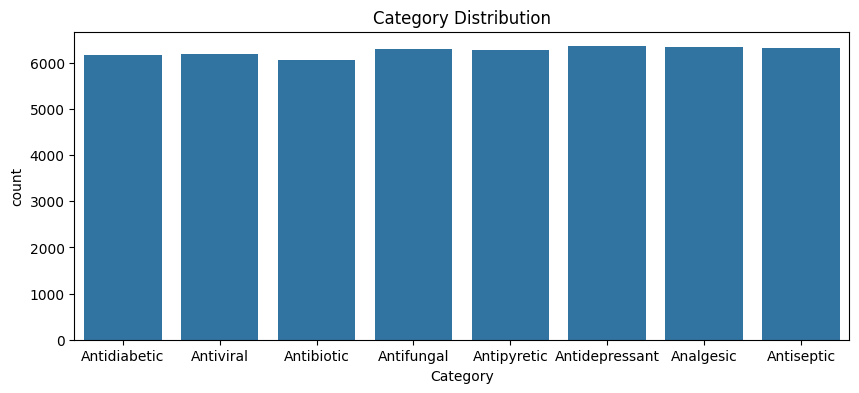

In [8]:
# Category distribution
plt.figure(figsize=(10,4))
sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.show()

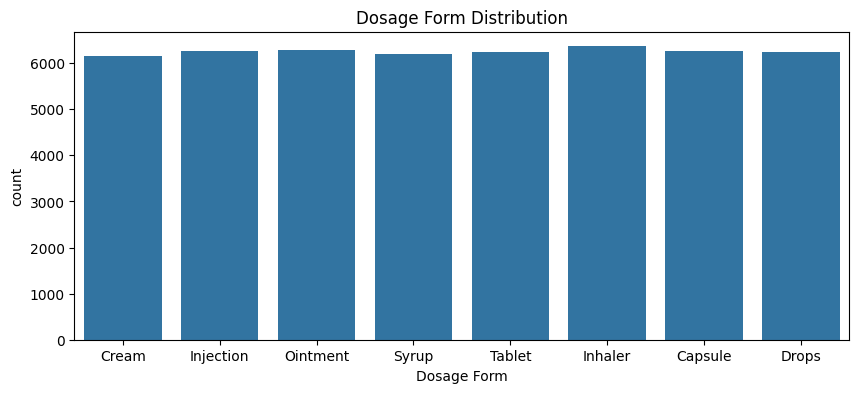

In [9]:
# Dosage distribution
plt.figure(figsize=(10,4))
sns.countplot(x='Dosage Form', data=df)
plt.title('Dosage Form Distribution')
plt.show()

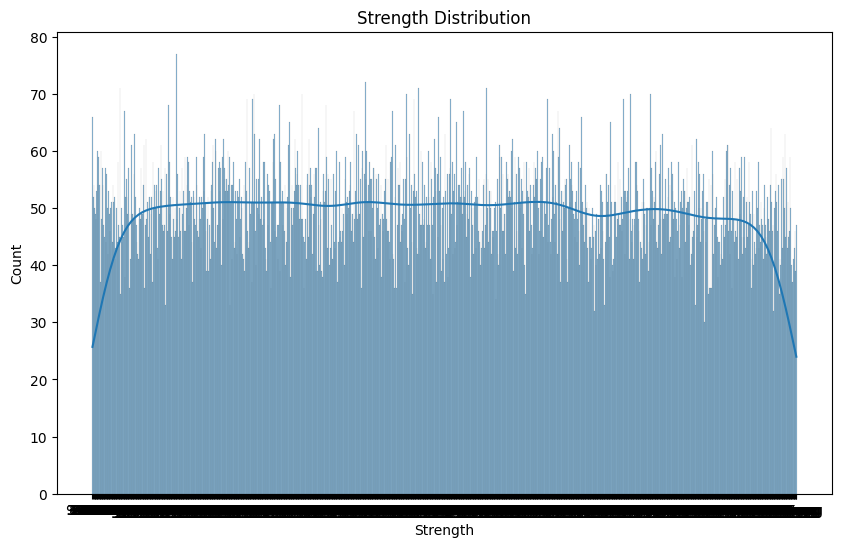

In [10]:
# Strength distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Strength'], bins=30, kde=True)
plt.title('Strength Distribution')
plt.show()

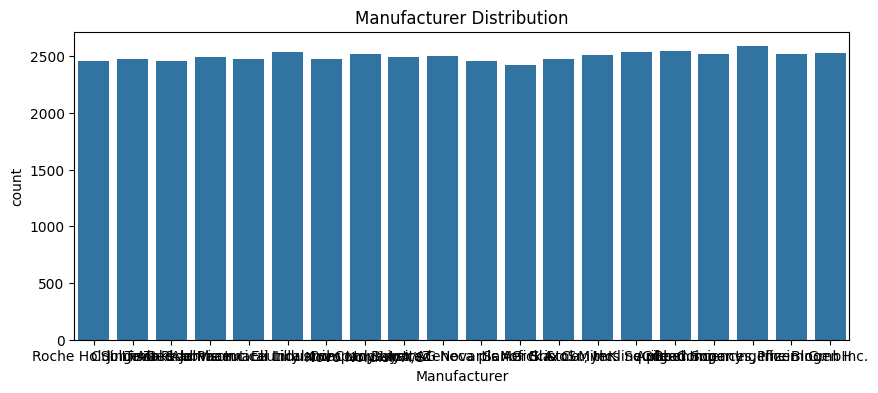

In [11]:
# Manufacturer distribution
plt.figure(figsize=(10,4))
sns.countplot(x='Manufacturer', data=df)
plt.title('Manufacturer Distribution')
plt.show()

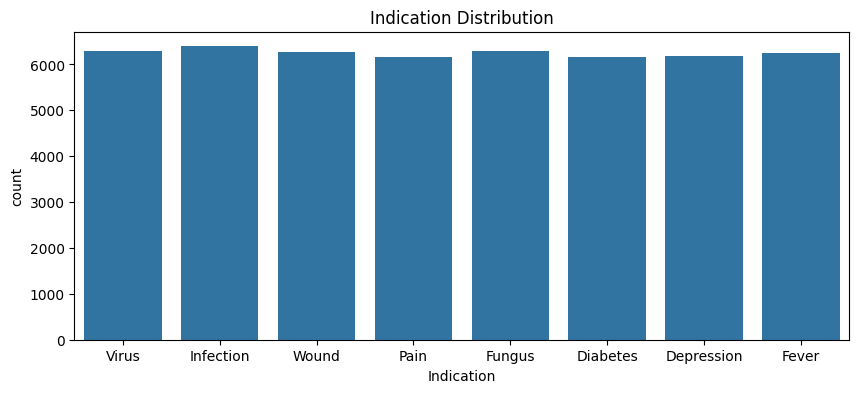

In [12]:
# Indication distribution
plt.figure(figsize=(10,4))
sns.countplot(x='Indication', data=df)
plt.title('Indication Distribution')
plt.show()

**Data Pre-processing**

In [13]:
# Check for missing values
print(df.isnull().sum())

Name              0
Category          0
Dosage Form       0
Strength          0
Manufacturer      0
Indication        0
Classification    0
dtype: int64


In [14]:
# Initialize a dictionary to store LabelEncoder instances for each categorical column
label_encoders = {}

# Encode categorical features
for col in df.columns:
    if df[col].dtype == 'object':  # Encode only categorical variables
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

In [15]:
df.head()

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,0,3,1,931,16,6,0
1,48,7,4,264,7,4,0
2,36,1,5,260,11,7,1
3,27,4,6,292,0,5,1
4,8,4,7,781,19,7,0


# Models

In [16]:
# Select numerical features for kNN 
features = ['Category', 'Dosage Form', 'Strength', 'Manufacturer', 'Indication', 'Classification']

# Create a kNN model
k = 5  # Number of neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn_model.fit(df[features])

,n_neighbors,5
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'euclidean'
,p,2
,metric_params,None
,n_jobs,None


In [17]:
# Function to recommend medicines based on kNN
def recommend_medicines_knn(medicine_index, knn_model=knn_model, df=df, top_n=5):
    # Get the features of the medicine at the given index
    medicine_features = df.iloc[medicine_index][features].values.reshape(1, -1)
    
    # Find nearest neighbors
    distances, indices = knn_model.kneighbors(medicine_features)
    
    # Extract indices of nearest neighbors (excluding the medicine itself)
    neighbor_indices = indices[0][1:top_n+1]
    
    # Return recommended medicines
    recommendations = df.iloc[neighbor_indices].copy()
    
    # Reverse transformation for Category and Indication columns
    for col in ['Name', 'Category', 'Indication']:  # Adjust column names as per your actual column names
        if col in label_encoders:
            recommendations[col] = label_encoders[col].inverse_transform(recommendations[col])
    
    return recommendations

In [18]:
# Example usage: Recommend medicines similar to a specific medicine (by index)
# Replace 'medicine_index' with the index of the medicine you want to find recommendations for

medicine_index = 0 # Change here
input_details = df.iloc[medicine_index][['Name', 'Category', 'Indication']]

# Decode categorical columns
for col in ['Name', 'Category', 'Indication']:
    if col in label_encoders:
        input_details[col] = label_encoders[col].inverse_transform([input_details[col]])[0]

# Print input medicine details
print(f"Input Medicine Details (Index {medicine_index}):")
print(input_details)

recommendations = recommend_medicines_knn(medicine_index)

print(recommendations[['Name', 'Category', 'Indication']])

Input Medicine Details (Index 0):
Name           Acetocillin
Category      Antidiabetic
Indication           Virus
Name: 0, dtype: object
               Name        Category Indication
31560       Dolomet      Antifungal      Wound
27223     Clariphen    Antidiabetic  Infection
16678    Metonazole    Antidiabetic      Wound
22285  Ibuprostatin  Antidepressant       Pain


C:\Users\HP\AppData\Local\Temp\ipykernel_24132\3914901449.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Acetocillin' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  input_details[col] = label_encoders[col].inverse_transform([input_details[col]])[0]
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
